# Projeto: Machine Learning II
***Projeto Santander Coders 2023.2 | Ada***

**Professor:** Jorge Chamby-Diaz

**Descrição:** Este notebook contém o desenvolvimento do projeto proposto como conclusão da disciplina de `Machine Learning II`.

**Dataset(s) Utilizado(s):** [covid19br](https://github.com/wcota/covid19br/)

> W. Cota, “Monitoring the number of COVID-19 cases and deaths in brazil at municipal and federative units level”, SciELOPreprints:362 (2020), 10.1590/scielopreprints.362

## Parte 0: Bibliotecas Utilizadas e Imports

In [154]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Parte 1: Visualizando o conjunto de dados

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')

# Como sugerido pelo autor do dataset
# vamos alterar a coluna 'date' para um formato 'datatime'
df['date'] = pd.to_datetime(df['date'])

df.head(10)

epi_week       date country  state   city  newDeaths  deaths  newCases  \
0         9 2020-02-25  Brazil     SP  TOTAL          0       0         1   
1         9 2020-02-25  Brazil  TOTAL  TOTAL          0       0         1   
2         9 2020-02-26  Brazil     SP  TOTAL          0       0         0   
3         9 2020-02-26  Brazil  TOTAL  TOTAL          0       0         0   
4         9 2020-02-27  Brazil     SP  TOTAL          0       0         0   
5         9 2020-02-27  Brazil  TOTAL  TOTAL          0       0         0   
6         9 2020-02-28  Brazil     SP  TOTAL          0       0         1   
7         9 2020-02-28  Brazil  TOTAL  TOTAL          0       0         1   
8         9 2020-02-29  Brazil     SP  TOTAL          0       0         0   
9         9 2020-02-29  Brazil  TOTAL  TOTAL          0       0         0   

   totalCases  deathsMS  ...  tests  tests_per_100k_inhabitants  vaccinated  \
0           1         0  ...    NaN                         NaN         NaN   
1           1         0  ...    NaN                         NaN         NaN   
2           1         0  ...    NaN                         NaN         NaN   
3           1         0  ...    NaN                         NaN         NaN   
4           1         0  ...    NaN                         NaN         NaN   
5           1         0  ...    NaN                         NaN         NaN   
6           2         0  ...    NaN                         NaN         NaN   
7           2         0  ...    NaN                         NaN         NaN   
8           2         0  ...    NaN                         NaN         NaN   
9           2         0  ...    NaN                         NaN         NaN   

   vaccinated_per_100_inhabitants  vaccinated_second  \
0                             NaN                NaN   
1                             NaN                NaN   
2                             NaN                NaN   
3                             NaN                NaN   
4                             NaN                NaN   
5                             NaN                NaN   
6                             NaN                NaN   
7                             NaN                NaN   
8                             NaN                NaN   
9                             NaN                NaN   

   vaccinated_second_per_100_inhabitants  vaccinated_single  \
0                                    NaN                NaN   
1                                    NaN                NaN   
2                                    NaN                NaN   
3                                    NaN                NaN   
4                                    NaN                NaN   
5                                    NaN                NaN   
6                                    NaN                NaN   
7                                    NaN                NaN   
8                                    NaN                NaN   
9                                    NaN                NaN   

   vaccinated_single_per_100_inhabitants  vaccinated_third  \
0                                    NaN               NaN   
1                                    NaN               NaN   
2                                    NaN               NaN   
3                                    NaN               NaN   
4                                    NaN               NaN   
5                                    NaN               NaN   
6                                    NaN               NaN   
7                                    NaN               NaN   
8                                    NaN               NaN   
9                                    NaN               NaN   

   vaccinated_third_per_100_inhabitants  
0                                   NaN  
1                                   NaN  
2                                   NaN  
3                                   NaN  
4                                   NaN  
5                                   NaN

In [94]:
print('Shape: ', df.shape)
df.info()

Shape:  (30842, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30842 entries, 0 to 30841
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   epi_week                               30842 non-null  int64         
 1   date                                   30842 non-null  datetime64[ns]
 2   country                                30842 non-null  object        
 3   state                                  30842 non-null  object        
 4   city                                   30842 non-null  object        
 5   newDeaths                              30842 non-null  int64         
 6   deaths                                 30842 non-null  int64         
 7   newCases                               30842 non-null  int64         
 8   totalCases                             30842 non-null  int64         
 9   deathsMS                               30

Com a ajuda da descrição das colunas fornecida pelo autor [aqui](https://github.com/wcota/covid19br/blob/master/DESCRIPTION.md), vamos filtrar alguns dados e criar novas colunas que podem ser úteis para nossa análise:

In [95]:
# Criando novas colunas
df['active_cases'] = df['totalCases'] - df['deaths'] - df['recovered']

In [96]:
df[['epi_week', 'vaccinated', 'vaccinated_second', 'vaccinated_third', 'active_cases']].tail(10)

epi_week   vaccinated  vaccinated_second  vaccinated_third  \
30832       311   14716972.0         13809945.0        12211486.0   
30833       311    2979308.0          2772139.0         2030138.0   
30834       311    1328876.0          1186864.0          697735.0   
30835       311     473511.0           369284.0          175984.0   
30836       311    9877242.0          9431834.0         8439439.0   
30837       311    6308275.0          5862014.0         4166331.0   
30838       311    2023048.0          1860868.0         1376006.0   
30839       311   43381275.0         40857206.0        29057424.0   
30840       311    1183632.0          1029319.0          595805.0   
30841       311  183869403.0        170385963.0       126348017.0   

       active_cases  
30832      728776.0  
30833      197245.0  
30834      116795.0  
30835       28436.0  
30836      774032.0  
30837      356600.0  
30838       39613.0  
30839     1440403.0  
30840       79842.0  
30841     9004794.0

In [97]:
unique_weeks = df['epi_week'].unique()
unique_weeks.sort()

mapped_values = { value: new_value for new_value, value in enumerate(unique_weeks, start=unique_weeks[0])}
df['seq_epi_week'] = df['epi_week'].map(mapped_values)

In [98]:
df['epi_week'].unique()

array([  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311], dtype=int64)

In [99]:
df['seq_epi_week'].unique()

array([  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168], dtype=int64)

### O que é possível entender a partir desses dados?
<h4>Descrição das colunas</h4>

| coluna | descrição |
| :--- | --- |
| epi_week | Representa a semana epidemiológica, agregada ao ano da epidemia. Ano 2020 conta como ano 0, e é representado pelos valores 1 a 53. Ano 2021 é representado pelos números 101 a 152, e assim por diante. |
| date | Data de divulgação |
| country | Nome do país (sempre Brazil) |
| state | Nome da unidade federativa |
| city | Sempre “TOTAL” |
| newDeaths | Número de novos óbitos divulgados |
| deaths | Número acumulado de óbitos |
| newCases | Número de novos casos divulgados |
| totalCases | Número acumulado de casos |
| deathsMS | Número acumulado de obitos pelo Ministério da Saúde |
| totalCasesMS | Número acumulado de casos pelo Ministério da Saúde |
| deaths_per_100k_inhabitants | Número de óbitos por 100 mil habitantes |
| totalCases_per_100k_inhabitants | Número de casos por 100 mil habitantes |
| deaths_by_totalCases | Razão entre número de óbitos e casos (`deaths`/`totalCases`) |
| recovered | Número de recuperados |
| suspects | Número de suspeitos |
| tests | Número de testes realizados |
| tests_per_100k_inhabitants | Número de testes realizados por 100 mil habitantes |
| vaccinated | Número de pessoas que receberam a primeira dose |
| vaccinated_per_100_inhabitants | Porcentagem de pessoas que receberam a primeira dose |
| vaccinated_second | Número de pessoas que receberam a segunda dose |
| vaccinated_second_per_100_inhabitants | Porcentagem de pessoas que receberam a segunda dose |
| vaccinated_single | Número de pessoas que receberam a dose única |
| vaccinated_single_per_100_inhabitants | Porcentagem de pessoas que receberam a dose única |
| vaccinated_third | Número de pessoas que receberam a dose de reforço |
| vaccinated_third_per_100_inhabitants | Porcentagem de pessoas que receberam a dose de reforço |
| active_cases | Casos ainda ativos |
| seq_epi_week | Representa a semana epidemiológica de forma sequêncial. |

Dessa forma, vemos que algumas colunas podem ser descartadas antes de começarmos a analisar os dados. Serão elas:
- `country`: possui sempre o valor `Brazil`, informação que já temos de forma geral.
- `city`: possui sempre o valor `TOTAL`, que não nos informa nada específico.
- `death_by_totalCases`: é um valor diretamente relacionado a dois valores que já possuímos.
- `deathsMS`: se relaciona à mesma informação da coluna `deaths`.
- `totalCasesMS`: se relaciona à mesma informação da coluna `totalCases`.

Além disso, algumas colunas mostram valores brutos, enquanto outras mostram valores ajustados para uma comparação entre estados com populações diferentes. Transformar-lo-emos em 2 _datasets_ distintos.

Outro ponto perceptível é que existe um conjunto de entradas, marcados na coluna `state` com o valor `TOTAL`, que representa o valor acumulado entre todos os estados. Vamos filtrar o conjunto, excluindo essas linhas.

In [100]:
# Tratamento: Removendo agregação em 'state'
df = df[df['state'] != 'TOTAL']
df.head(10)

epi_week       date country state   city  newDeaths  deaths  newCases  \
0          9 2020-02-25  Brazil    SP  TOTAL          0       0         1   
2          9 2020-02-26  Brazil    SP  TOTAL          0       0         0   
4          9 2020-02-27  Brazil    SP  TOTAL          0       0         0   
6          9 2020-02-28  Brazil    SP  TOTAL          0       0         1   
8          9 2020-02-29  Brazil    SP  TOTAL          0       0         0   
10        10 2020-03-01  Brazil    SP  TOTAL          0       0         0   
12        10 2020-03-02  Brazil    SP  TOTAL          0       0         0   
14        10 2020-03-03  Brazil    SP  TOTAL          0       0         0   
16        10 2020-03-04  Brazil    SP  TOTAL          0       0         1   
18        10 2020-03-05  Brazil    RJ  TOTAL          0       0         1   

    totalCases  deathsMS  ...  vaccinated  vaccinated_per_100_inhabitants  \
0            1         0  ...         NaN                             NaN   
2            1         0  ...         NaN                             NaN   
4            1         0  ...         NaN                             NaN   
6            2         0  ...         NaN                             NaN   
8            2         0  ...         NaN                             NaN   
10           2         0  ...         NaN                             NaN   
12           2         0  ...         NaN                             NaN   
14           2         0  ...         NaN                             NaN   
16           3         0  ...         NaN                             NaN   
18           1         0  ...         NaN                             NaN   

    vaccinated_second  vaccinated_second_per_100_inhabitants  \
0                 NaN                                    NaN   
2                 NaN                                    NaN   
4                 NaN                                    NaN   
6                 NaN                                    NaN   
8                 NaN                                    NaN   
10                NaN                                    NaN   
12                NaN                                    NaN   
14                NaN                                    NaN   
16                NaN                                    NaN   
18                NaN                                    NaN   

    vaccinated_single  vaccinated_single_per_100_inhabitants  \
0                 NaN                                    NaN   
2                 NaN                                    NaN   
4                 NaN                                    NaN   
6                 NaN                                    NaN   
8                 NaN                                    NaN   
10                NaN                                    NaN   
12                NaN                                    NaN   
14                NaN                                    NaN   
16                NaN                                    NaN   
18                NaN                                    NaN   

    vaccinated_third  vaccinated_third_per_100_inhabitants  active_cases  \
0                NaN                                   NaN           NaN   
2                NaN                                   NaN           NaN   
4                NaN                                   NaN           NaN   
6                NaN                                   NaN           NaN   
8                NaN                                   NaN           NaN   
10               NaN                                   NaN           NaN   
12               NaN                                   NaN           NaN   
14               NaN                                   NaN           NaN   
16               NaN                                   NaN           NaN   
18               NaN                                   NaN           NaN   

    seq_epi_week  
0              9  
2              9  
4   

In [101]:
drop_columns = ['country', 'city', 'deaths_by_totalCases', 'deathsMS', 'totalCasesMS', 'epi_week', 'date']
dados_brutos = ['newDeaths', 'deaths', 'newCases', 'totalCases', 'recovered',
                'suspects', 'tests', 'vaccinated', 'vaccinated_second',
                'vaccinated_single', 'vaccinated_third', 'active_cases']
dados_ajustados = ['deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
                    'tests_per_100k_inhabitants', 'vaccinated_per_100_inhabitants',
                    'vaccinated_second_per_100_inhabitants', 'vaccinated_single_per_100_inhabitants',
                    'vaccinated_third_per_100_inhabitants']

# fazemos drops no dataset original, combinando as colunas a serem descartadas de modo geral
# com as colunas que serao usadas apenas pelo dataset complementar
df_bruto = df.drop(columns=[*drop_columns, *dados_ajustados])
df_comparacao = df.drop(columns=[*drop_columns, *dados_brutos])

In [102]:
df_bruto.head(10)

state  newDeaths  deaths  newCases  totalCases  recovered  suspects  tests  \
0     SP          0       0         1           1        NaN       NaN    NaN   
2     SP          0       0         0           1        NaN       NaN    NaN   
4     SP          0       0         0           1        NaN       NaN    NaN   
6     SP          0       0         1           2        NaN       NaN    NaN   
8     SP          0       0         0           2        NaN       NaN    NaN   
10    SP          0       0         0           2        NaN       NaN    NaN   
12    SP          0       0         0           2        NaN       NaN    NaN   
14    SP          0       0         0           2        NaN       NaN    NaN   
16    SP          0       0         1           3        NaN       NaN    NaN   
18    RJ          0       0         1           1        NaN       NaN    NaN   

    vaccinated  vaccinated_second  vaccinated_single  vaccinated_third  \
0          NaN                NaN                NaN               NaN   
2          NaN                NaN                NaN               NaN   
4          NaN                NaN                NaN               NaN   
6          NaN                NaN                NaN               NaN   
8          NaN                NaN                NaN               NaN   
10         NaN                NaN                NaN               NaN   
12         NaN                NaN                NaN               NaN   
14         NaN                NaN                NaN               NaN   
16         NaN                NaN                NaN               NaN   
18         NaN                NaN                NaN               NaN   

    active_cases  seq_epi_week  
0            NaN             9  
2            NaN             9  
4            NaN             9  
6            NaN             9  
8            NaN             9  
10           NaN            10  
12           NaN            10  
14           NaN            10  
16           NaN            10  
18           NaN            10

In [103]:
df_bruto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29724 entries, 0 to 30840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              29724 non-null  object 
 1   newDeaths          29724 non-null  int64  
 2   deaths             29724 non-null  int64  
 3   newCases           29724 non-null  int64  
 4   totalCases         29724 non-null  int64  
 5   recovered          29108 non-null  float64
 6   suspects           29157 non-null  float64
 7   tests              28451 non-null  float64
 8   vaccinated         21320 non-null  float64
 9   vaccinated_second  20685 non-null  float64
 10  vaccinated_single  17060 non-null  float64
 11  vaccinated_third   14941 non-null  float64
 12  active_cases       29108 non-null  float64
 13  seq_epi_week       29724 non-null  int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 3.4+ MB


In [104]:
df_comparacao.head(10)

state  deaths_per_100k_inhabitants  totalCases_per_100k_inhabitants  \
0     SP                          0.0                          0.00218   
2     SP                          0.0                          0.00218   
4     SP                          0.0                          0.00218   
6     SP                          0.0                          0.00436   
8     SP                          0.0                          0.00436   
10    SP                          0.0                          0.00436   
12    SP                          0.0                          0.00436   
14    SP                          0.0                          0.00436   
16    SP                          0.0                          0.00653   
18    RJ                          0.0                          0.00579   

    tests_per_100k_inhabitants  vaccinated_per_100_inhabitants  \
0                          NaN                             NaN   
2                          NaN                             NaN   
4                          NaN                             NaN   
6                          NaN                             NaN   
8                          NaN                             NaN   
10                         NaN                             NaN   
12                         NaN                             NaN   
14                         NaN                             NaN   
16                         NaN                             NaN   
18                         NaN                             NaN   

    vaccinated_second_per_100_inhabitants  \
0                                     NaN   
2                                     NaN   
4                                     NaN   
6                                     NaN   
8                                     NaN   
10                                    NaN   
12                                    NaN   
14                                    NaN   
16                                    NaN   
18                                    NaN   

    vaccinated_single_per_100_inhabitants  \
0                                     NaN   
2                                     NaN   
4                                     NaN   
6                                     NaN   
8                                     NaN   
10                                    NaN   
12                                    NaN   
14                                    NaN   
16                                    NaN   
18                                    NaN   

    vaccinated_third_per_100_inhabitants  seq_epi_week  
0                                    NaN             9  
2                                    NaN             9  
4                                    NaN             9  
6                                    NaN             9  
8                                    NaN             9  
10                                   NaN            10  
12                                   NaN            10  
14                                   NaN            10  
16                                   NaN            10  
18                                   NaN            10

In [105]:
df_comparacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29724 entries, 0 to 30840
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   state                                  29724 non-null  object 
 1   deaths_per_100k_inhabitants            29724 non-null  float64
 2   totalCases_per_100k_inhabitants        29724 non-null  float64
 3   tests_per_100k_inhabitants             28451 non-null  float64
 4   vaccinated_per_100_inhabitants         21320 non-null  float64
 5   vaccinated_second_per_100_inhabitants  20685 non-null  float64
 6   vaccinated_single_per_100_inhabitants  17060 non-null  float64
 7   vaccinated_third_per_100_inhabitants   14941 non-null  float64
 8   seq_epi_week                           29724 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 2.3+ MB


### Compreendendo as informações de maneira mais visual
Vamos tentar criar alguns gráficos, para começar a enteder o que podemos inferir dos dados, e quais problemas podemos levantar para tentar responder com modelos de _Machine Learning_.

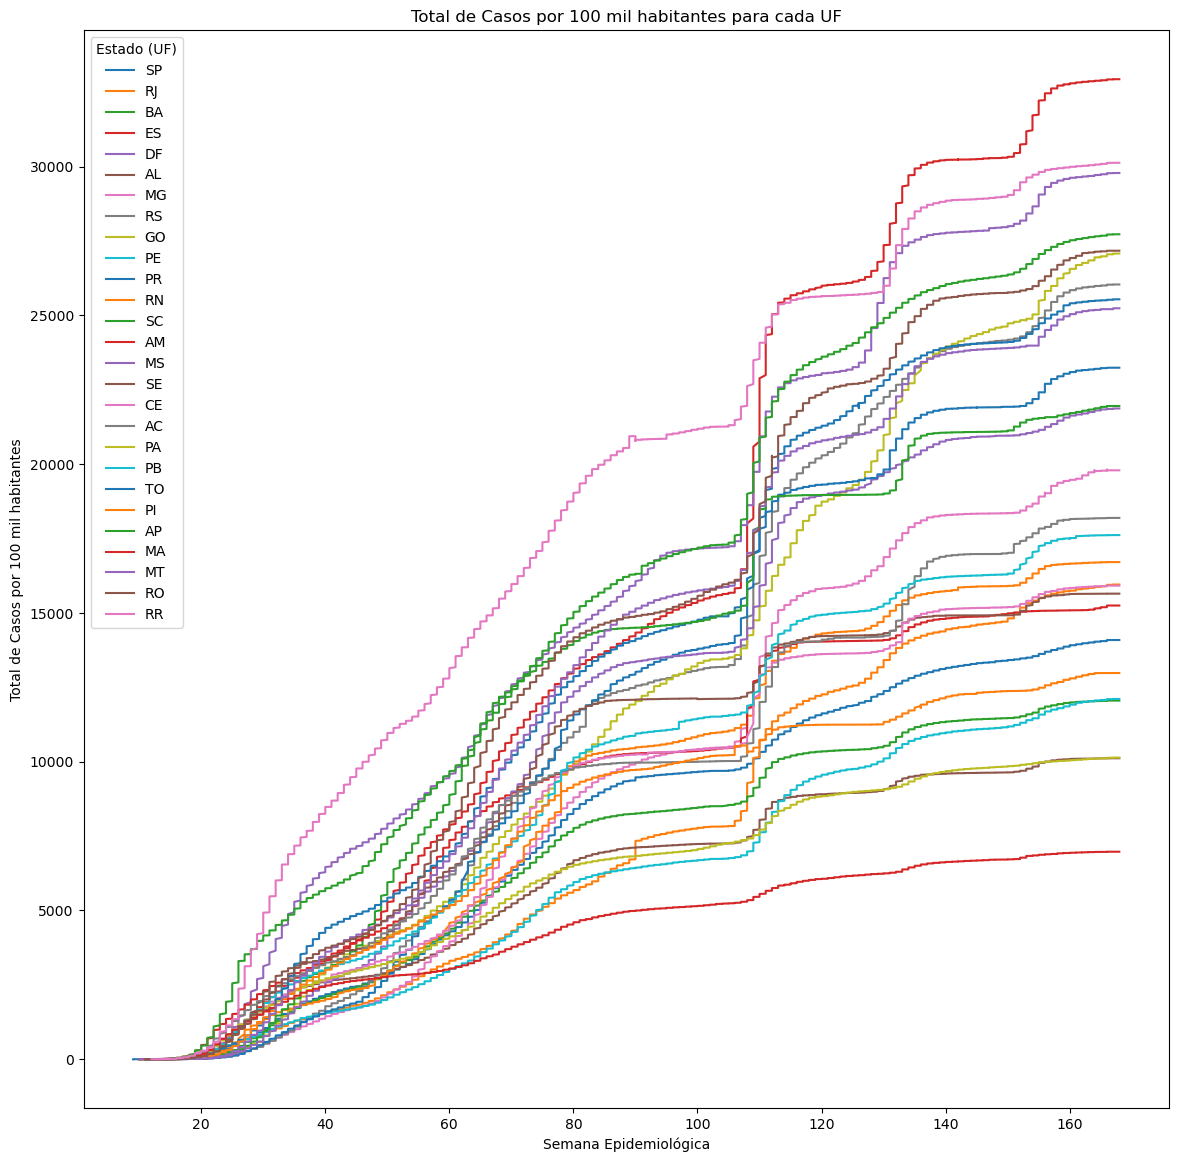

In [106]:
states = df_comparacao['state'].unique().tolist()

plt.figure(figsize=(14, 14))

for state in states:
    state_data = df_comparacao[df_comparacao['state'] == state]
    plt.plot(
        state_data['seq_epi_week'],
        state_data['totalCases_per_100k_inhabitants'],
        label=state,
        linestyle='-',
        )

plt.title('Total de Casos por 100 mil habitantes para cada UF')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Total de Casos por 100 mil habitantes')

# plt.gcf().autofmt_xdate()

plt.legend(title='Estado (UF)')

plt.show()

Podemos perceber que houve um crescimento geral, como era esperado, da taxa de casos entre os estados com o decorrer do tempo de recorte do _dataset_. No entanto, é possível perceber que mesmo com os dados normalizados para cada estado, essa taxa de crescimento difere bastante entre estados à medida que o tempo decorre.

Usando `Plotly`, vamos tentar identificar um pouco melhor como as coisas acontecem.

In [107]:
fig = px.line(
    data_frame=df_comparacao,
    x='seq_epi_week',
    y='totalCases_per_100k_inhabitants',
    color='state',
    markers=False,
)
fig.show()

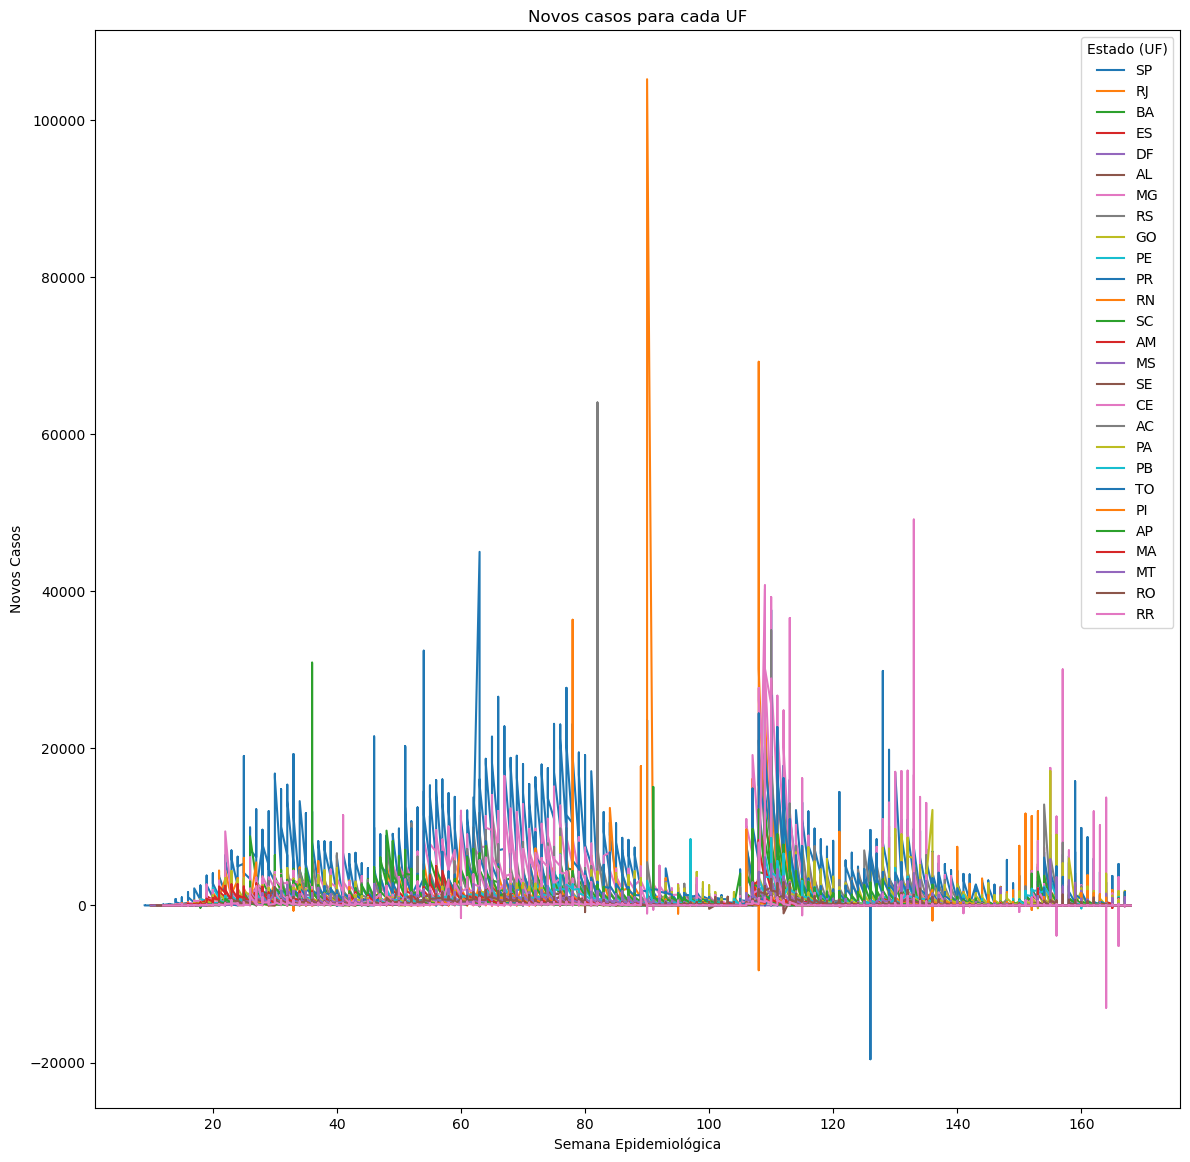

In [108]:
states = df_bruto['state'].unique().tolist()

plt.figure(figsize=(14, 14))

for state in states:
    state_data = df_bruto[df_bruto['state'] == state]
    plt.plot(
        state_data['seq_epi_week'],
        state_data['newCases'],
        label=state,
        linestyle='-',
        )


plt.title('Novos casos para cada UF')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Novos Casos')

# plt.gcf().autofmt_xdate()

plt.legend(title='Estado (UF)')

plt.show()

Percebemos que existem alguns valores negativos, o que mostra que há algo estranho nessa coluna. Vamos averiguar em mais detalhes.

In [109]:
negative_cases_df = df_bruto[df_bruto['newCases'] < 0]

In [110]:
negative_cases_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1409 to 30595
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              54 non-null     object 
 1   newDeaths          54 non-null     int64  
 2   deaths             54 non-null     int64  
 3   newCases           54 non-null     int64  
 4   totalCases         54 non-null     int64  
 5   recovered          53 non-null     float64
 6   suspects           54 non-null     float64
 7   tests              54 non-null     float64
 8   vaccinated         50 non-null     float64
 9   vaccinated_second  50 non-null     float64
 10  vaccinated_single  46 non-null     float64
 11  vaccinated_third   44 non-null     float64
 12  active_cases       53 non-null     float64
 13  seq_epi_week       54 non-null     int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 6.3+ KB


In [111]:
negative_cases_df.head(10)

state  newDeaths  deaths  newCases  totalCases  recovered  suspects  \
1409     SC          2      50      -290        2104        NaN     621.0   
3606     GO         20    1106       -13       40782    12513.0   99654.0   
4261     RN          6    2025      -211       57921    28243.0   18016.0   
4289     RN         17    2042      -649       57272    28243.0   20144.0   
9623     CE         26   10922     -1582      406973   308294.0   37544.0   
10173    SC        107    8277      -110      711953   672006.0  127721.0   
13474    RO         13    6226       -47      251977   234484.0  365081.0   
13502    RO          8    6234      -850      251127   234484.0  365081.0   
15463    RR          2    1982     -1015      125840   120282.0    5095.0   
15615    CE          1   24158      -531      935400   809911.0   37894.0   

           tests  vaccinated  vaccinated_second  vaccinated_single  \
1409     10621.0         NaN                NaN                NaN   
3606     82468.0         NaN                NaN                NaN   
4261    155861.0         NaN                NaN                NaN   
4289    155861.0         NaN                NaN                NaN   
9623   1373571.0    259525.0            44477.0                NaN   
10173  1683529.0    267902.0            81351.0                NaN   
13474   640738.0    540002.0           170092.0                NaN   
13502   640738.0    551086.0           175909.0                NaN   
15463   327716.0    310736.0           101104.0            10231.0   
15615  2647712.0   5930187.0          3062110.0           159426.0   

       vaccinated_third  active_cases  seq_epi_week  
1409                NaN           NaN            18  
3606                NaN       27163.0            30  
4261                NaN       27653.0            33  
4289                NaN       26987.0            33  
9623                NaN       87757.0            60  
10173               NaN       31670.0            63  
13474               NaN       11267.0            80  
13502               NaN       10409.0            80  
15463               NaN        3576.0            90  
15615               NaN      101331.0            91

Será que o mesmo se repete para `newDeaths`?

In [112]:
negative_deaths_df = df_bruto[df_bruto['newDeaths'] < 0]
negative_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 1562 to 30007
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              89 non-null     object 
 1   newDeaths          89 non-null     int64  
 2   deaths             89 non-null     int64  
 3   newCases           89 non-null     int64  
 4   totalCases         89 non-null     int64  
 5   recovered          88 non-null     float64
 6   suspects           89 non-null     float64
 7   tests              89 non-null     float64
 8   vaccinated         80 non-null     float64
 9   vaccinated_second  79 non-null     float64
 10  vaccinated_single  79 non-null     float64
 11  vaccinated_third   74 non-null     float64
 12  active_cases       88 non-null     float64
 13  seq_epi_week       89 non-null     int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 10.4+ KB


Precisaremos filtrar esses dados e removê-los, antes de continuar.
Vamos aplicar esse tratamento no nosso `df` original, e mais uma vez separar as colunas em dois datasets, como haviamos feito anteriormente.

In [113]:
# Tratamento: Removendo agregação em 'state'
df = df[df['newDeaths'] >= 0]
df = df[df['newCases'] >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29584 entries, 0 to 30840
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   epi_week                               29584 non-null  int64         
 1   date                                   29584 non-null  datetime64[ns]
 2   country                                29584 non-null  object        
 3   state                                  29584 non-null  object        
 4   city                                   29584 non-null  object        
 5   newDeaths                              29584 non-null  int64         
 6   deaths                                 29584 non-null  int64         
 7   newCases                               29584 non-null  int64         
 8   totalCases                             29584 non-null  int64         
 9   deathsMS                               29584 non-null  int64      

In [114]:
drop_columns = ['country', 'city', 'deaths_by_totalCases', 'deathsMS', 'totalCasesMS', 'epi_week', 'date']
dados_brutos = ['newDeaths', 'deaths', 'newCases', 'totalCases', 'recovered',
                'suspects', 'tests', 'vaccinated', 'vaccinated_second',
                'vaccinated_single', 'vaccinated_third', 'active_cases']
dados_ajustados = ['deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
                    'tests_per_100k_inhabitants', 'vaccinated_per_100_inhabitants',
                    'vaccinated_second_per_100_inhabitants', 'vaccinated_single_per_100_inhabitants',
                    'vaccinated_third_per_100_inhabitants']

# fazemos drops no dataset original, combinando as colunas a serem descartadas de modo geral
# com as colunas que serao usadas apenas pelo dataset complementar
df_bruto = df.drop(columns=[*drop_columns, *dados_ajustados])
df_comparacao = df.drop(columns=[*drop_columns, *dados_brutos])

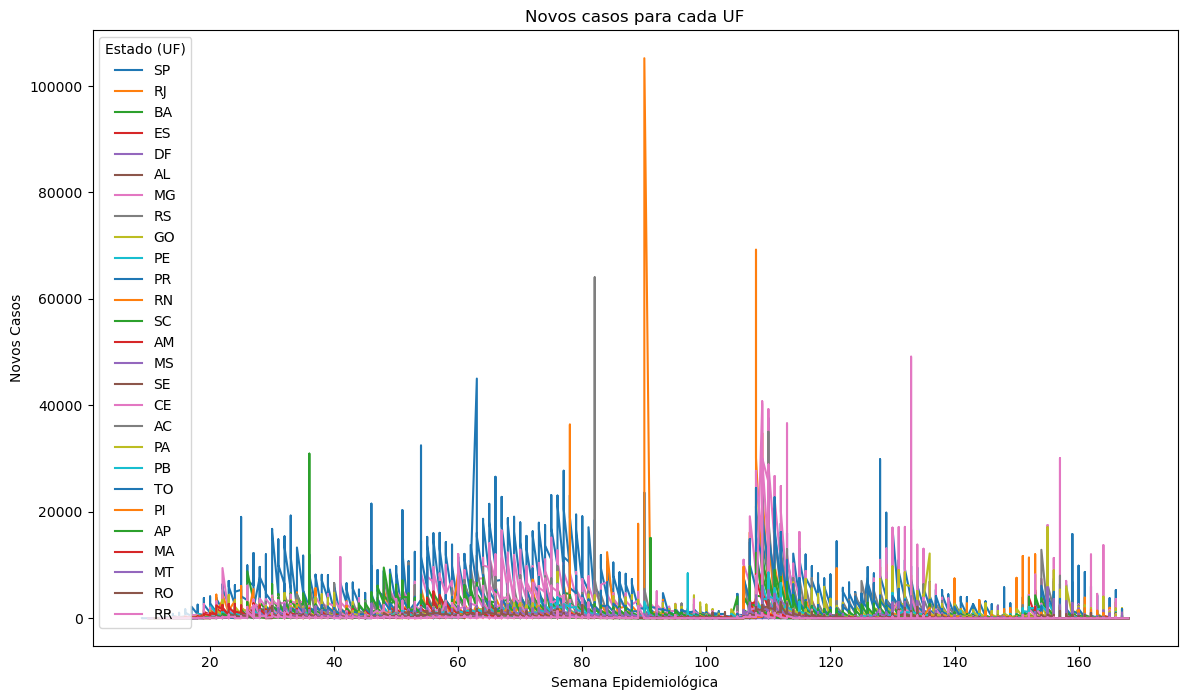

In [115]:
states = df_bruto['state'].unique().tolist()

plt.figure(figsize=(14, 8))

for state in states:
    state_data = df_bruto[df_bruto['state'] == state]
    plt.plot(
        state_data['seq_epi_week'],
        state_data['newCases'],
        label=state,
        linestyle='-',
        )


plt.title('Novos casos para cada UF')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Novos Casos')

# plt.gcf().autofmt_xdate()

plt.legend(title='Estado (UF)')

plt.show()

Vamos tentar entender um pouco mais como os dados se relacionam.

c:\Users\bruno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



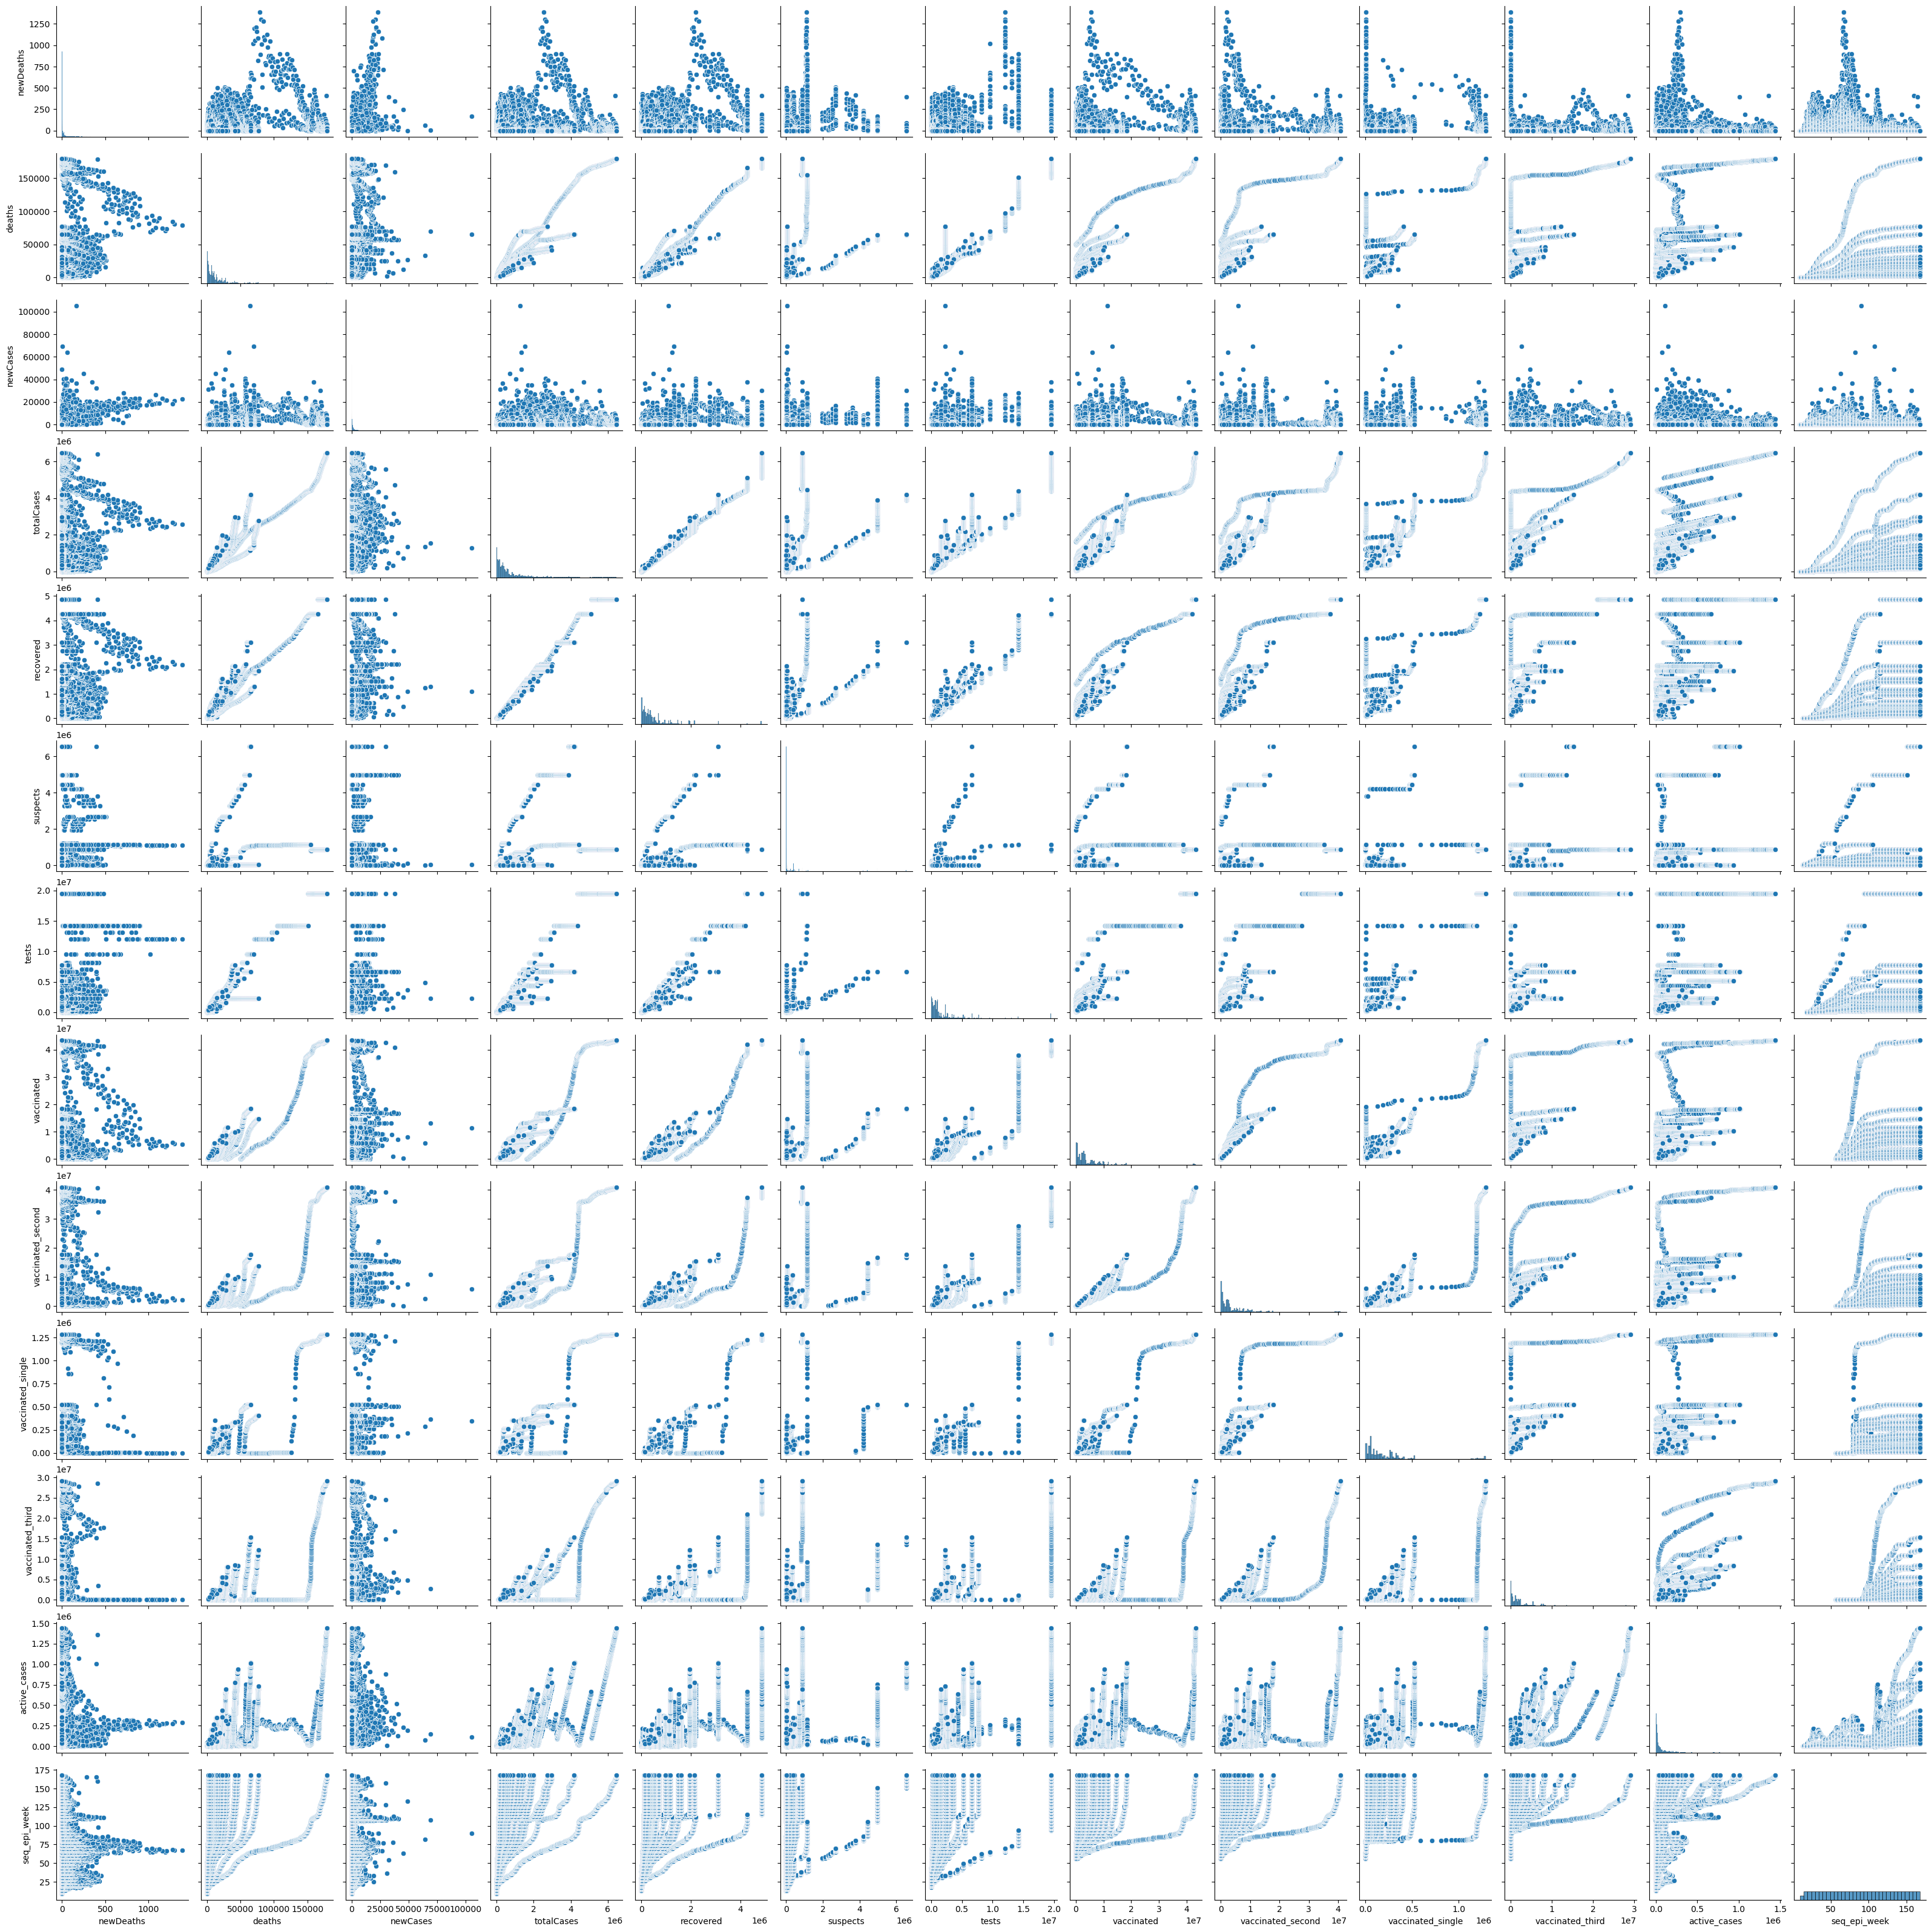

In [116]:
sns.pairplot(df_bruto)

E vamos aplicar um pré-processamento para garantir que os dados vão se comportar de maneira mais uniforme, antes de tentar visualizar a correlação entre eles. Ao final desse processo, esperamos poder montar uma `pipeline` de tratamento, limpeza e transformação dos dados antes de tentarmos aplicar modelos.

Nosso objetivo inicial é tentar compreender como as métricas que temos se relacionam.

In [117]:
df_bruto.describe()

newDeaths         deaths       newCases    totalCases     recovered  \
count  29584.000000   29584.000000   29584.000000  2.958400e+04  2.897000e+04   
mean      23.636898   16615.634870    1253.512101  7.217528e+05  6.239111e+05   
std       62.822988   27164.211007    2691.090260  1.006599e+06  8.444474e+05   
min        0.000000       0.000000       0.000000  1.000000e+00  1.000000e+00   
25%        1.000000    2412.500000      76.000000  1.404878e+05  1.260230e+05   
50%        5.000000    7959.000000     417.000000  3.649570e+05  3.330945e+05   
75%       20.000000   18567.500000    1274.000000  8.498630e+05  6.994770e+05   
max     1389.000000  179039.000000  105200.000000  6.469442e+06  4.850000e+06   

           suspects         tests    vaccinated  vaccinated_second  \
count  2.901700e+04  2.831100e+04  2.119300e+04       2.055900e+04   
mean   2.343294e+05  1.845772e+06  5.082167e+06       4.289688e+06   
std    7.844654e+05  3.086413e+06  7.390578e+06       6.691285e+06   
min    1.000000e+00  8.540000e+02  2.000000e+00       4.000000e+00   
25%    1.141000e+03  4.037740e+05  9.736860e+05       5.733875e+05   
50%    1.064700e+04  9.039750e+05  2.711251e+06       2.262640e+06   
75%    1.301170e+05  2.164746e+06  6.305426e+06       5.382482e+06   
max    6.540804e+06  1.950178e+07  4.338128e+07       4.085721e+07   

       vaccinated_single  vaccinated_third  active_cases  seq_epi_week  
count       1.693800e+04      1.482600e+04  2.897000e+04  29584.000000  
mean        1.882482e+05      3.022626e+06  9.616648e+04     89.709776  
std         2.407221e+05      4.869555e+06  1.858477e+05     45.379805  
min         1.900000e+01      1.000000e+00 -7.627000e+03      9.000000  
25%         5.341300e+04      3.520670e+05  7.563250e+03     50.000000  
50%         1.123220e+05      1.377746e+06  2.200500e+04     90.000000  
75%         2.617970e+05      3.216344e+06  9.304225e+04    129.000000  
max         1.286285e+06      2.905742e+07  1.440403e+06    168.000000

In [130]:
df_pretransform = df_bruto.drop(columns=['state'])
df_pretransform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29584 entries, 0 to 30840
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   newDeaths          29584 non-null  int64  
 1   deaths             29584 non-null  int64  
 2   newCases           29584 non-null  int64  
 3   totalCases         29584 non-null  int64  
 4   recovered          28970 non-null  float64
 5   suspects           29017 non-null  float64
 6   tests              28311 non-null  float64
 7   vaccinated         21193 non-null  float64
 8   vaccinated_second  20559 non-null  float64
 9   vaccinated_single  16938 non-null  float64
 10  vaccinated_third   14826 non-null  float64
 11  active_cases       28970 non-null  float64
 12  seq_epi_week       29584 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 3.2 MB


Ainda temos alguns valores nulos. Vamos utilizar o `SimpleInputer` do `SKLearn` para ajustar e substituir esses valores.

In [131]:
input_num = SimpleImputer()
filled = input_num.fit_transform(df_pretransform)

df_filled = pd.DataFrame(
    data=filled,
    columns=df_pretransform.columns
)

In [135]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   newDeaths          29584 non-null  float64
 1   deaths             29584 non-null  float64
 2   newCases           29584 non-null  float64
 3   totalCases         29584 non-null  float64
 4   recovered          29584 non-null  float64
 5   suspects           29584 non-null  float64
 6   tests              29584 non-null  float64
 7   vaccinated         29584 non-null  float64
 8   vaccinated_second  29584 non-null  float64
 9   vaccinated_single  29584 non-null  float64
 10  vaccinated_third   29584 non-null  float64
 11  active_cases       29584 non-null  float64
 12  seq_epi_week       29584 non-null  float64
dtypes: float64(13)
memory usage: 2.9 MB


In [132]:
# usando o MinMaxScaler do SKLearn
scaler = MinMaxScaler()
transformed_data = scaler.fit_transform(df_filled)

In [133]:
df_transformed = pd.DataFrame(
    data=transformed_data,
    columns=df_filled.columns
)

df_transformed.describe()

newDeaths        deaths      newCases    totalCases     recovered  \
count  29584.000000  29584.000000  29584.000000  29584.000000  29584.000000   
mean       0.017017      0.092805      0.011916      0.111563      0.128641   
std        0.045229      0.151722      0.025581      0.155593      0.172297   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000720      0.013475      0.000722      0.021715      0.025984   
50%        0.003600      0.044454      0.003964      0.056412      0.072057   
75%        0.014399      0.103706      0.012110      0.131366      0.144222   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           suspects         tests    vaccinated  vaccinated_second  \
count  29584.000000  29584.000000  29584.000000       29584.000000   
mean       0.035826      0.094607      0.117151           0.104992   
std        0.118779      0.154827      0.144192           0.136524   
min        0.000000      0.000000      0.000000           0.000000   
25%        0.000186      0.021366      0.040308           0.028444   
50%        0.001628      0.050938      0.117151           0.104992   
75%        0.026308      0.101393      0.117151           0.104992   
max        1.000000      1.000000      1.000000           1.000000   

       vaccinated_single  vaccinated_third  active_cases  seq_epi_week  
count       29584.000000      29584.000000  29584.000000  29584.000000  
mean            0.146338          0.104022      0.071679      0.507609  
std             0.141606          0.118634      0.127006      0.285408  
min             0.000000          0.000000      0.000000      0.000000  
25%             0.066651          0.047364      0.010623      0.257862  
50%             0.146338          0.104022      0.021078      0.509434  
75%             0.146338          0.104022      0.071679      0.754717  
max             1.000000          1.000000      1.000000      1.000000

<Axes: >

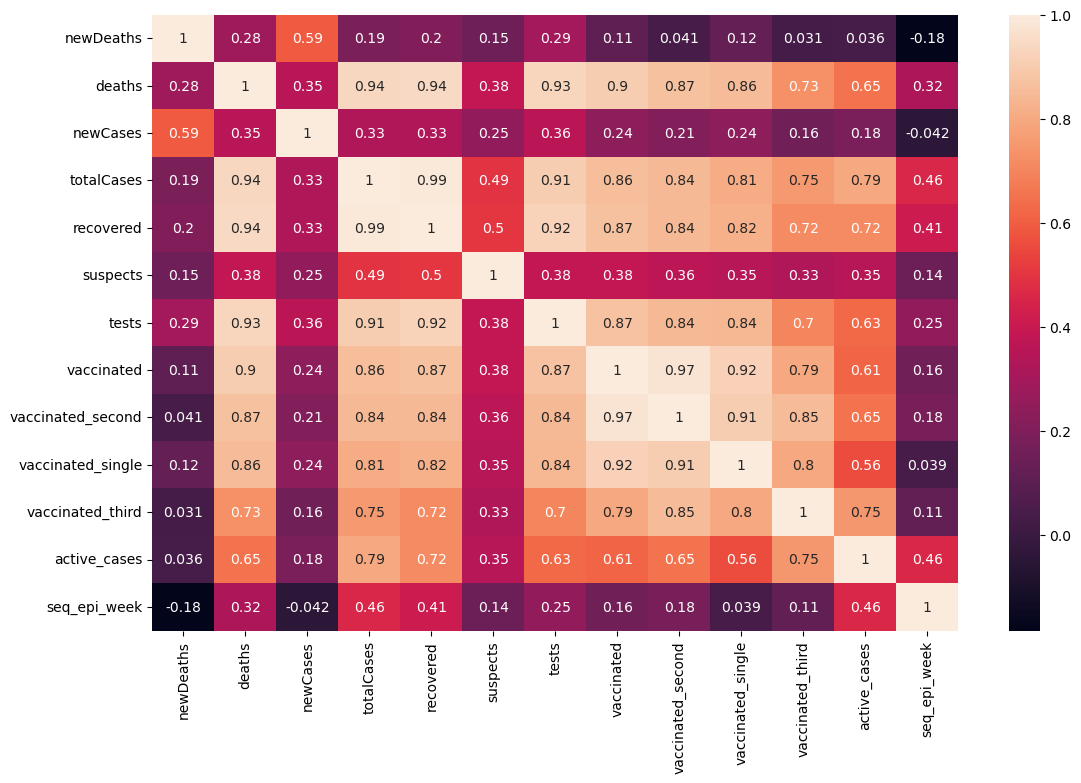

In [134]:
plt.figure(figsize=(13,8))
sns.heatmap(df_transformed.corr(), annot=True)

# Parte 2 - Montando a Pipeline

## Definindo o que será aplicado:
> Por definição, **problemas de clusterização** são não-supervisionados. Isso quer dizer que a amostra não contém _targets_, apenas as _features_. Sendo assim, nosso objetivo é justamente o de descobrir **alguma estrutura de agrupamento** nos dados, sem informação prévia quanto aos grupos a serem formados. Ou, mais formalmente: _"O objetivo central é dividir os dados em grupos distintos, tais que membros de cada grupo sejam similares entre si."_

### Aplicando o método para definição de clusters.
Inicialmente, aplicaremos a métrica de Inércia (WCSS - _Wihtin-Cluster-Sum-of-Squares_) e o método do cotovelo para tentar definir quantos clusters idealmente nosso modelo deve ter.

Esse método consiste em rodar o _k-Means_ várias vezes, para diferentes valores de $k$ e depois plotar um gráfico com a **inércia** de cada uma das rodadas.

In [137]:
# cada etapa dessa função é parte da seção anterior do notebook
def get_dataset() -> pd.DataFrame:
    df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')

    df['active_cases'] = df['totalCases'] - df['deaths'] - df['recovered']
    unique_weeks = df['epi_week'].unique()
    unique_weeks.sort()

    mapped_values = { value: new_value for new_value, value in enumerate(unique_weeks, start=unique_weeks[0])}
    df['seq_epi_week'] = df['epi_week'].map(mapped_values)

    df = df[df['state'] != 'TOTAL']

    df = df[df['newDeaths'] >= 0]
    df = df[df['newCases'] >= 0]

    drop_columns = ['country', 'city', 'deaths_by_totalCases', 'deathsMS', 'totalCasesMS',
                    'epi_week', 'date', 'state']
    dados_ajustados = ['deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
                        'tests_per_100k_inhabitants', 'vaccinated_per_100_inhabitants',
                        'vaccinated_second_per_100_inhabitants', 'vaccinated_single_per_100_inhabitants',
                        'vaccinated_third_per_100_inhabitants']

    df_bruto = df.drop(columns=[*drop_columns, *dados_ajustados])

    input_num = SimpleImputer()
    filled = input_num.fit_transform(df_bruto)

    df_filled = pd.DataFrame(
        data=filled,
        columns=df_bruto.columns
    )

    scaler = MinMaxScaler()
    transformed_data = scaler.fit_transform(df_filled)
    df_transformed = pd.DataFrame(
        data=transformed_data,
        columns=df_filled.columns
    )
    return df_transformed

In [159]:
def calc_inercias(X, lista_k):
    lista_inercias = []
    
    for k in lista_k:
        kmeans = KMeans(n_clusters = k, n_init='auto')
        kmeans.fit(X)

        # Cálculo das inércias
        inercia = kmeans.inertia_
        lista_inercias.append(inercia)

    return lista_inercias

In [160]:
# função para plotar as inércias
def plot_cotovelo(lista_k, lista_inercias):
    plt.figure(figsize=(8,5))
    
    plt.title('Método do cotovelo')
    plt.plot(lista_k, lista_inercias, marker = "o")
    
    plt.xlabel("k")
    plt.ylabel("Inércia (WCSS)")
    
    plt.show()

In [163]:
df_covid = get_dataset()
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   newDeaths          29584 non-null  float64
 1   deaths             29584 non-null  float64
 2   newCases           29584 non-null  float64
 3   totalCases         29584 non-null  float64
 4   recovered          29584 non-null  float64
 5   suspects           29584 non-null  float64
 6   tests              29584 non-null  float64
 7   vaccinated         29584 non-null  float64
 8   vaccinated_second  29584 non-null  float64
 9   vaccinated_single  29584 non-null  float64
 10  vaccinated_third   29584 non-null  float64
 11  active_cases       29584 non-null  float64
 12  seq_epi_week       29584 non-null  float64
dtypes: float64(13)
memory usage: 2.9 MB


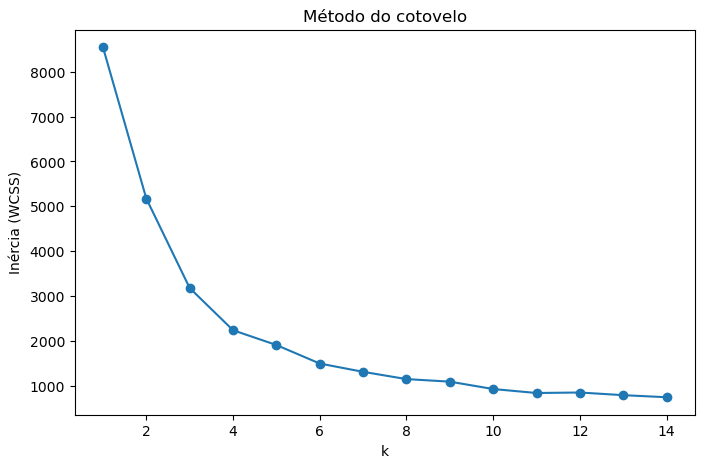

In [166]:
inercias = calc_inercias(df_covid, range(1, 15))
plot_cotovelo(range(1, 15), inercias)

Pela aplicação do método do cotovelo, parece que $k = 8$ é o nosso número ideal de _clusters_.